In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as data

In [2]:
!pip install pandas_datareader

In [3]:
start = '2010-01-01'
end ='2022-06-01'

df= data.DataReader('AAPL','yahoo',start, end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.434925
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.535086
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.546384
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.442255
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.430345


In [4]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-05-25,141.789993,138.339996,138.429993,140.520004,92482700.0,140.520004
2022-05-26,144.339996,137.139999,137.389999,143.779999,90601500.0,143.779999
2022-05-27,149.679993,145.259995,145.389999,149.639999,90978500.0,149.639999
2022-05-31,150.660004,146.839996,149.070007,148.839996,103718400.0,148.839996
2022-06-01,151.740005,147.679993,149.899994,148.710007,74286600.0,148.710007


In [5]:
df=df.reset_index()
df

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.434925
1,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.535086
2,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.546384
3,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.442255
4,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.430345
...,...,...,...,...,...,...,...
3121,2022-05-25,141.789993,138.339996,138.429993,140.520004,92482700.0,140.520004
3122,2022-05-26,144.339996,137.139999,137.389999,143.779999,90601500.0,143.779999
3123,2022-05-27,149.679993,145.259995,145.389999,149.639999,90978500.0,149.639999
3124,2022-05-31,150.660004,146.839996,149.070007,148.839996,103718400.0,148.839996


In [6]:
df=df.drop(['Date','Adj Close'],axis=1)
df.head()

,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0


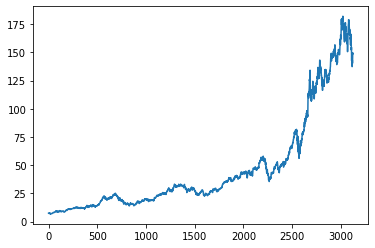

In [7]:
plt.plot(df.Close)

In [8]:
df

,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0
...,...,...,...,...,...
3121,141.789993,138.339996,138.429993,140.520004,92482700.0
3122,144.339996,137.139999,137.389999,143.779999,90601500.0
3123,149.679993,145.259995,145.389999,149.639999,90978500.0
3124,150.660004,146.839996,149.070007,148.839996,103718400.0


In [9]:
ma100=df.Close.rolling(100).mean()

In [10]:
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3121    164.3734
3122    163.9911
3123    163.6905
3124    163.4297
3125    163.1968
Name: Close, Length: 3126, dtype: float64

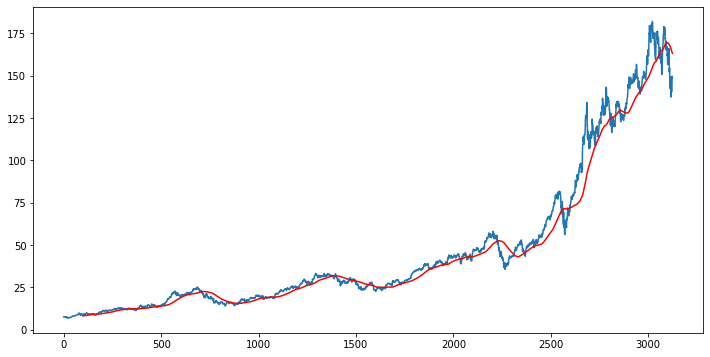

In [11]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [12]:
ma200=df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3121    159.50665
3122    159.49625
3123    159.50000
3124    159.49870
3125    159.48665
Name: Close, Length: 3126, dtype: float64

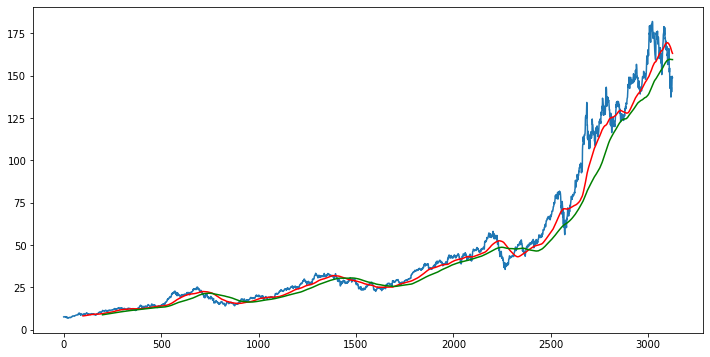

In [13]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [14]:
df.shape

(3126, 5)

In [15]:
# SPILITING DATA INTO TRAINING AND TESTING

data_train = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_test = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_train.shape)
print(data_test.shape)


(2188, 1)
(938, 1)


In [16]:
data_train.head()

,Close
0,7.526071
1,7.643214
2,7.656429
3,7.534643
4,7.520714


In [17]:
data_test.head()

,Close
2188,55.962502
2189,55.267502
2190,56.602501
2191,55.959999
2192,54.470001


In [18]:
!pip install Sklearn

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))


In [20]:
data_train_array= scaler.fit_transform(data_train)

data_train_array


array([[0.01328146],
       [0.01561354],
       [0.01587662],
       ...,
       [0.97382101],
       [0.9648624 ],
       [0.9500807 ]])

In [21]:
data_train_array.shape

(2188, 1)

In [22]:
x_train=[]
y_train=[]


for i in range(100, data_train_array.shape[0]):
    x_train.append(data_train_array[i-100: i])
    y_train.append(data_train_array[i, 0])
    
x_train, y_train =np.array(x_train), np.array(y_train)

In [23]:
x_train.shape

(2088, 100, 1)

In [24]:
!pip install keras

In [25]:
!pip install tensorflow

In [26]:
# ML Model
 
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [27]:
model = Sequential()
model.add(LSTM(units = 50, activation= 'relu', return_sequences = True,
              input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
          
          
model.add(LSTM(units = 60, activation= 'relu', return_sequences = True))
model.add(Dropout(0.3))
          
          
          
model.add(LSTM(units = 80, activation= 'relu', return_sequences = True))
model.add(Dropout(0.4))
                    
          
          
model.add(LSTM(units = 120, activation= 'relu'))
model.add(Dropout(0.5))
          
          
model.add(Dense(units = 1))

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [29]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train,y_train, epochs = 50)

Epoch 1/50
66/66 [==============================] - 12s 140ms/step - loss: 0.0321
Epoch 2/50
66/66 [==============================] - 9s 136ms/step - loss: 0.0082
Epoch 3/50
66/66 [==============================] - 9s 132ms/step - loss: 0.0067
Epoch 4/50
66/66 [==============================] - 8s 128ms/step - loss: 0.0049
Epoch 5/50
66/66 [==============================] - 8s 124ms/step - loss: 0.0041
Epoch 6/50
66/66 [==============================] - 8s 125ms/step - loss: 0.0043
Epoch 7/50
66/66 [==============================] - 8s 129ms/step - loss: 0.0036
Epoch 8/50
66/66 [==============================] - 8s 127ms/step - loss: 0.0044
Epoch 9/50
66/66 [==============================] - 9s 131ms/step - loss: 0.0035
Epoch 10/50
66/66 [==============================] - 9s 134ms/step - loss: 0.0032
Epoch 11/50
66/66 [==============================] - 9s 135ms/step - loss: 0.0036
Epoch 12/50
66/66 [==============================] - 9s 143ms/step - loss: 0.0033
Epoch 13/50
66/66 [=====

In [30]:
model.save('keras_modelClosing.h5')

In [31]:
data_test.head()

,Close
2188,55.962502
2189,55.267502
2190,56.602501
2191,55.959999
2192,54.470001


In [32]:
past_100_days = data_train.tail(100)

In [33]:
final_df = past_100_days.append(data_test, ignore_index=True)

In [34]:
final_df.head()

,Close
0,43.200001
1,41.430000
2,41.310001
3,40.735001
4,40.912498


In [35]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.05224887],
       [0.04016386],
       [0.03934455],
       ...,
       [0.77898782],
       [0.77352565],
       [0.77263812]])

In [36]:
input_data.shape

(1038, 1)

In [37]:
x_test=[]
y_test=[]


for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])
    

In [38]:
x_test, y_test =np.array(x_test), np.array(y_test)

print(x_test.shape)
print(y_test.shape)

(938, 100, 1)
(938,)


In [39]:
# PREDICTIONS

y_predicted= model.predict(x_test)

30/30 [==============================] - 2s 44ms/step


In [40]:
y_predicted.shape

(938, 1)

In [41]:
y_test

array([0.13938723, 0.13464199, 0.14375694, 0.13937014, 0.1291969 ,
       0.1298114 , 0.13003328, 0.13286677, 0.12882138, 0.13416403,
       0.13655373, 0.13353247, 0.14126483, 0.14261331, 0.14520781,
       0.1486558 , 0.15341813, 0.14645388, 0.14013825, 0.13925067,
       0.14454211, 0.12660237, 0.12334215, 0.13641717, 0.1283093 ,
       0.13648544, 0.13484681, 0.12602203, 0.13163779, 0.13392506,
       0.13747546, 0.12443458, 0.13247419, 0.12649996, 0.11956987,
       0.1213792 , 0.13086968, 0.13660494, 0.1114449 , 0.10139113,
       0.10511224, 0.115661  , 0.11316891, 0.10630708, 0.08872578,
       0.08541435, 0.07614578, 0.08401469, 0.08763335, 0.07454126,
       0.05938379, 0.05904241, 0.05137833, 0.05535546, 0.05470684,
       0.06614321, 0.06377059, 0.06211488, 0.07276608, 0.0588888 ,
       0.05552616, 0.04489204, 0.04678673, 0.04513101, 0.04593327,
       0.04909106, 0.03975419, 0.03712555, 0.0407613 , 0.03191943,
       0.02498933, 0.0145771 , 0.00792012, 0.02556968, 0.02382

In [42]:
y_predicted

array([[0.14097291],
       [0.14250225],
       [0.14390165],
       [0.1451774 ],
       [0.14633697],
       [0.14736539],
       [0.1482459 ],
       [0.1489692 ],
       [0.14954151],
       [0.14996806],
       [0.1502679 ],
       [0.15046999],
       [0.1505976 ],
       [0.15068486],
       [0.15076822],
       [0.1508826 ],
       [0.1510636 ],
       [0.15134718],
       [0.15173969],
       [0.15221539],
       [0.15273666],
       [0.15327956],
       [0.1537865 ],
       [0.15419215],
       [0.15447593],
       [0.15462556],
       [0.15465377],
       [0.15458167],
       [0.15441476],
       [0.15416595],
       [0.15385757],
       [0.15352027],
       [0.15315795],
       [0.1527797 ],
       [0.15238652],
       [0.1519629 ],
       [0.1514962 ],
       [0.15099919],
       [0.15050547],
       [0.1500031 ],
       [0.14944191],
       [0.14877406],
       [0.1479977 ],
       [0.14712815],
       [0.14617573],
       [0.14511976],
       [0.14392221],
       [0.142

In [43]:
scaler.scale_

array([0.00682769])

In [44]:
scale_factor =1/0.2099517
y_predicted =y_predicted* scale_factor
y_test = y_test * scale_factor

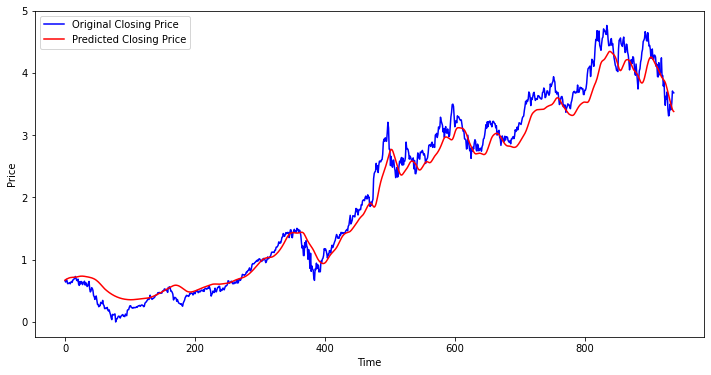

In [45]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label='Original Closing Price')
plt.plot(y_predicted, 'r', label= 'Predicted Closing Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()